# PROJECT 2: Investigate a Dataset
#### NAME: OSHODI IDAYAT ADEOLA
#### EMAIL: idayatadebisi@yahoo.com
#### Dataset [No-show appointments](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1532469042118000)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> The objective of this project is to show my understanding of the data analysis process using the data "No-show appointments", available in the link above.
>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
###### The data contains 14 columns:
    1.PatientID - Unique identification for the patients
    2.AppointmentID - Unique identification for the appointment
    3.Gender - F or M (Female or Male)
    4.ScheduledDay - Day the appointment was schduled
    5.AppointmentDay - Day of the appointment
    6.Age - Age of the patient
    7.Neighbourhood - Location of the hospital
    8.Scholarship - whether or not the patient is enrolled in Brasilian welfare program Bolsa Família
    (9,10,11,12)- ('Hipertension','Diabetes','Alcoholism','Handcap')- Underlining medical condions    for the patients (0 - indicates patients does not have, 1 - patient has)
    13 - SMS Received - If patients received SMS for their appointment
    14 - No-show - indicates if patient showed up or not.
###### Questions to explore with the data:
1.	What is the correlation between age and showing up for appointment?
2.	If scheduled date = appointment date, does that affect the rate of show up?
3.	Do Patients with Underling health conditions show up more than others without?
4.	Does gender affect the rate of showing up for appointments?
5.	Do Patients with Scholarships show up more than those without?

In [1]:
# importing packages needed for the analysis
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### General Properties
> Checking for general properties of the data set, such as getting the numbers of rows and columns, the datatype of the columns, check for duplicates, check for missing values, general characteristics of the dataset such as mean, standard deviation, min and max values, 25th, 50th and 75th percentile. 

In [2]:
# load dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# check the number of rows and columns in the data set
df.shape

(110527, 14)

In [4]:
# check the data types
df.info()# can be seen that no column has missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


###### No column has missing values

In [5]:
# check for duplicates
sum(df.duplicated())

0

###### No duplicate found

In [6]:
# check the characteristics of the data set
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


###### The min value for Age is -1. There shouldn't be negative value or 0 for Age, this will taken care of at the data cleaning section.

### Data Cleaning
> Follwoing the review of the general properties above, the following actions are necessary to clean up the data for analysis.
###### Actions:
1. Drop the PatientId and AppointmentID columns as those will not be needed for the analysis
2. Drop the rows with "Age" value less than or equal to 0
3. Change datatype for ScheduledDay and AppointmentDay to datetime
4. Remove the _ and - symbol in the SMS_Received and No-show columns
5. Rename all columns to lower case.

In [7]:
# drop the PatientId and AppointmentID columns
df.drop(['PatientId','AppointmentID'], axis=1, inplace = True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [8]:
# get the index for rows with Age < 0
idx = df.index[df['Age'] <= 0]
idx 

Int64Index([    59,     63,     64,     65,     67,     89,    101,    104,
               132,    150,
            ...
            110335, 110339, 110341, 110342, 110343, 110345, 110346, 110454,
            110460, 110507],
           dtype='int64', length=3540)

In [9]:
# Drop the rows with "Age" value less than 0
df.drop(idx, inplace = True)
df.query('Age <= 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [10]:
# Change datatype for ScheduledDay and AppointmentDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [11]:
# confirm data type change
print(df['AppointmentDay'].dtypes)
print(df['ScheduledDay'].dtypes)

datetime64[ns, UTC]
datetime64[ns, UTC]


In [12]:
# Remove the _ and - symbol in the SMS_Received and No-show columns
df.rename(columns = {'SMS_received':'SMSreceived','No-show':'Noshow'}, inplace = True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSreceived,Noshow
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
# Rename all columns to lower case
df.rename(columns = lambda x: x.strip().lower(), inplace = True)
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
> This section will be used to explore and answer the Research questions above

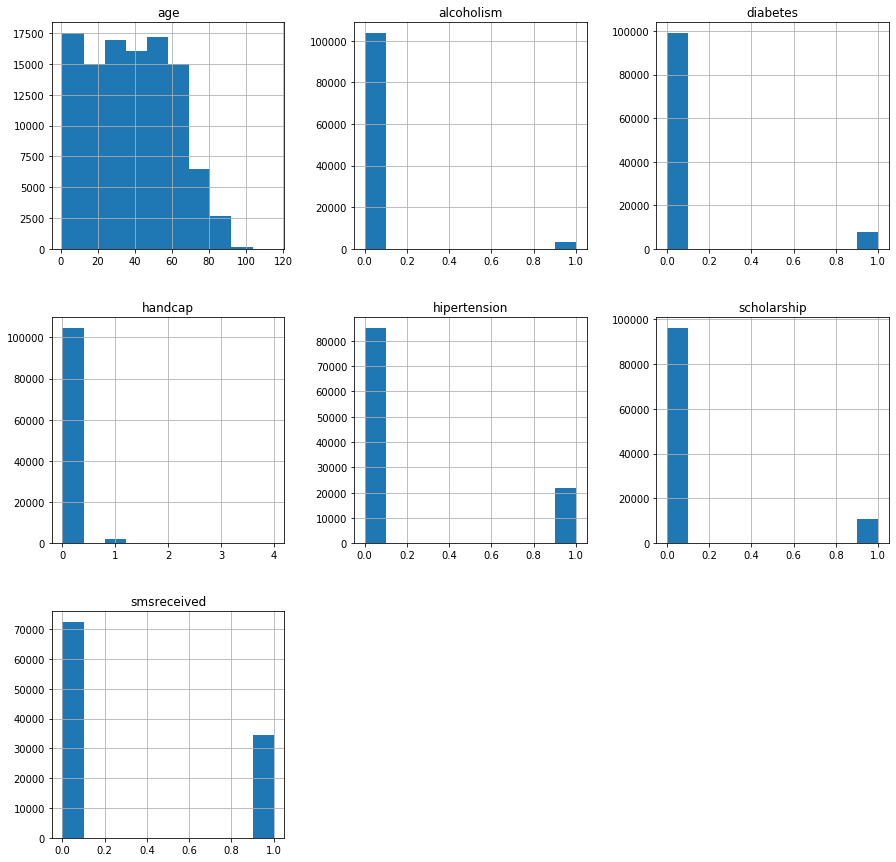

In [14]:
# histogram of the data set
df.hist(figsize = (15, 15));

Deductions from the above histograms:
- The age distribution is skewed to the right
- Majority of the patients have no underlining health conditions as most of the values for the columns (Hipertension, Diabetes, Alcoholism, and Handcap) are 0
- Majority of the patients are not benefiting from the Brasilian welfare program
- Majority of the patients did not receive SMS

#### Q1: What is the correlation between age and showing up for appointment?

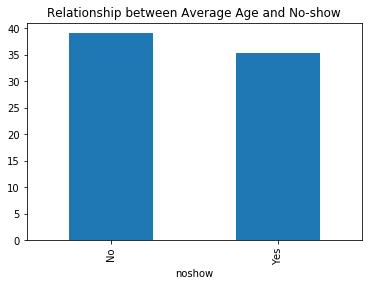

In [15]:
# plot the mean of the patients ages against whether they show for appointment or not
df.groupby('noshow')['age'].mean().plot(kind = 'bar', title = 'Relationship between Average Age and No-show');

It is seen that on the average, more patients show for appointments than those who did not. However, it will be better to get the number of patients in each category before concluding.
Also, since the age range differs from 1 to 115 years, it is appropriate to group the patients into age brackets, for easy comparison.

In [16]:
# get the distribution of the ages to be used in creating a new column 'age range'
df['age'].describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

In [17]:
# add a new column to the data set based on the age of the patient
bin_edges = [1,19,38,56,115]
bin_names = ['Young','Teen','Adult','Aged']
df['agerange'] = pd.cut(df['age'], bin_edges, labels = bin_names)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,agerange
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Aged
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Aged
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Young
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult


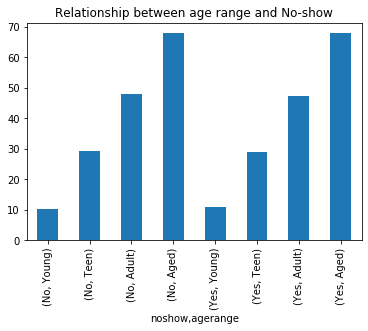

In [18]:
# relationship between age range and No-show
df.groupby(['noshow','agerange'])['age'].mean().plot(kind = 'bar', title = 'Relationship between age range and No-show');

In [19]:
df.groupby('noshow').count()['gender']

noshow
No     85307
Yes    21680
Name: gender, dtype: int64

Since the number is not equally distributed, the comparison will be done by proportion

In [20]:
counts = df.groupby(['noshow','agerange'])['age'].count()

In [21]:
totals = df.groupby('noshow').count()['gender']

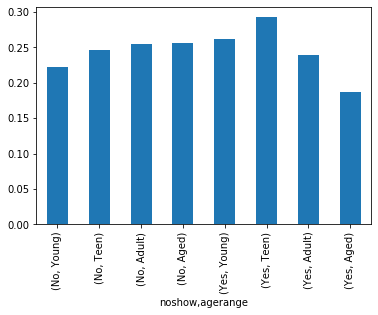

In [22]:
proportions = counts/totals
proportions.plot(kind = 'bar');

This seems like a better representation, however, a proper visualization will be done using matplotlib

In [23]:
# proportions of patients that showed for appointments
No_proportions = counts['No'] / totals['No']
No_proportions

agerange
Young    0.221693
Teen     0.246099
Adult    0.254539
Aged     0.255888
Name: age, dtype: float64

In [24]:
# proportion of patients that did not show for appointments
Yes_proportions = counts['Yes'] / totals['Yes']
Yes_proportions

agerange
Young    0.262315
Teen     0.292435
Adult    0.239760
Aged     0.186347
Name: age, dtype: float64

In [25]:
ind = np.arange(len(No_proportions))  # the x locations for the groups
width = 0.3 

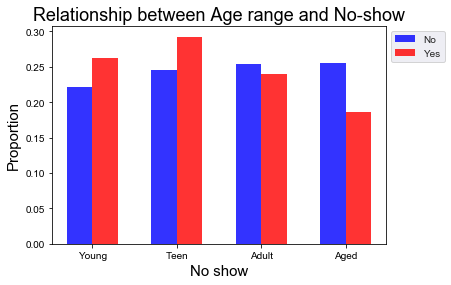

In [26]:
No_bars = plt.bar(ind, No_proportions, width, color='b', alpha=.8, label='No')
Yes_bars = plt.bar(ind + width, Yes_proportions, width, color='r', alpha=.8, label='Yes')

# title and labels
plt.ylabel('Proportion', fontsize = 15)
plt.xlabel('No show', fontsize = 15)
plt.title('Relationship between Age range and No-show',fontsize = 18)
locations = ind + width / 2  # xtick locations
labels = ['Young', 'Teen', 'Adult', 'Aged']  # xtick labels
plt.xticks(locations, labels)
sns.set_style('darkgrid')
# legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

###### It can be deduced from the above graph that:
- Adults and Aged Patients show up more for their appointments
- The proportion of Young and Teen patients that show up for appointments is less than those that did not show up.

#### Q2: If scheduled date = appointment date, does that affect the rate of show up?
- i.e if a patient fixes an appointment for the same day it was scheduled, does that affect the rate of showing up for the appointment.

In [27]:
# create a new column to indicate sameday appointments
df['samedayappointment'] = (df['scheduledday'].dt.date == df['appointmentday'].dt.date)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,agerange,samedayappointment
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Aged,True
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,True
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Aged,True
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Young,True
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult,True


In [28]:
# replace the (True/False) with (1,0)
df['samedayappointment'] = df['samedayappointment'].replace((True,False),(1,0))
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,agerange,samedayappointment
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Aged,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Aged,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Young,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult,1


In [29]:
# group by noshow and samedayappointment to get respective count
counts = df.groupby(['noshow','samedayappointment']).count()['gender']
counts

noshow  samedayappointment
No      0                     49894
        1                     35413
Yes     0                     19939
        1                      1741
Name: gender, dtype: int64

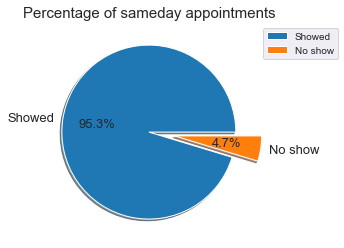

In [30]:
# plotting pie chart for sameday apointments
labels = ('Showed', 'No show')
sizes = [35413,1741]
plt.pie(sizes, explode = (0,0.3), labels = labels, shadow = True, autopct='%1.1f%%',textprops={'fontsize': 13})
plt.title('Percentage of sameday appointments', fontsize = 15)
plt.legend(loc=2, bbox_to_anchor=(1, 1));

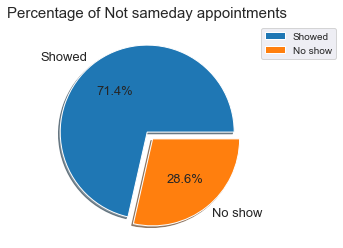

In [31]:
# plotting pie chart for Not sameday apointments
labels = ('Showed', 'No show')
sizes = [49894,19939]
plt.pie(sizes, explode = (0,0.1), labels = labels, shadow = True, autopct='%1.1f%%',textprops={'fontsize': 13})
plt.title('Percentage of Not sameday appointments', fontsize = 15)
plt.legend(loc=2, bbox_to_anchor=(1, 1));

###### It can be deduced from the two pie charts above that:
- 95.3% of patients with same day appointments show up for their appointments
- 71.4% of patients with Not sameday appointments show up for their appointments
- In conclusion, a higher percentage of patients with same day appointments show for their appointments compared to those with Not sameday appointments.

#### Q3: Do Patients with Underling health conditions show up more than others without?

In [32]:
# create a new column "condition" to indicate if a patient has an underlining health condition
df['condition'] = ((df['hipertension'] == 1) | (df['diabetes'] == 1) | (df['alcoholism'] == 1)| (df['handcap'] == 1))
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,agerange,samedayappointment,condition
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Aged,1,True
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,1,False
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Aged,1,False
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Young,1,False
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult,1,True


In [33]:
# replace the (True/False) with (1,0)
df['condition'] = df['condition'].replace((True,False),(1,0))
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,smsreceived,noshow,agerange,samedayappointment,condition
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Aged,1,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Adult,1,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Aged,1,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Young,1,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Adult,1,1


In [34]:
# group by noshow and health condition to get respective count
counts_cond = df.groupby(['noshow','condition']).count()['gender']
counts_cond

noshow  condition
No      0            63705
        1            21602
Yes     0            16980
        1             4700
Name: gender, dtype: int64

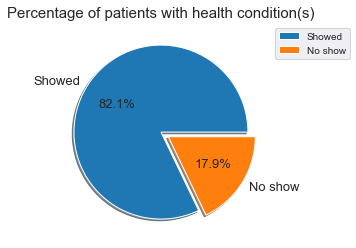

In [35]:
# plotting pie chart for patients with health condition(s)
labels = ('Showed', 'No show')
sizes = [21602,4700]
plt.pie(sizes, explode = (0,0.1), labels = labels, shadow = True, autopct='%1.1f%%',textprops={'fontsize': 13})
plt.title('Percentage of patients with health condition(s)', fontsize = 15)
plt.legend(loc=2, bbox_to_anchor=(1, 1));

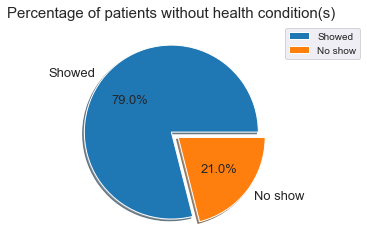

In [36]:
# plotting pie chart for patients without health condition(s)
labels = ('Showed', 'No show')
sizes = [63705,16980]
plt.pie(sizes, explode = (0,0.1), labels = labels, shadow = True, autopct='%1.1f%%',textprops={'fontsize': 13})
plt.title('Percentage of patients without health condition(s)', fontsize = 15)
plt.legend(loc=2, bbox_to_anchor=(1, 1));

###### It can be deduced from the two pie charts above that:
- 82.1% of patients with same day appointments show up for their appointments
- 79.0% of patients with Not sameday appointments show up for their appointments
- In conclusion, though with a slight difference of 3.1%, a higher percentage of patients with underlining health condition(s) show for their appointments compared to those without.

#### Q4: Does gender affect the rate of showing up for appointments?

In [37]:
# get the count of gender in each category of No-show
count_gen = df.groupby(['noshow','gender']).count()['age']
count_gen

noshow  gender
No      F         55843
        M         29464
Yes     F         14275
        M          7405
Name: age, dtype: int64

In [38]:
# get the total count to be used in determining proportion as it is obvious that the counts are not evenly distributed
totals_gen = df.groupby('noshow').count()['gender']
totals_gen

noshow
No     85307
Yes    21680
Name: gender, dtype: int64

In [39]:
No_proportions_gen = count_gen['No'] / totals_gen['No']
No_proportions_gen

gender
F    0.654612
M    0.345388
Name: age, dtype: float64

In [40]:
Yes_proportions_gen = count_gen['Yes'] / totals_gen['Yes']
Yes_proportions_gen

gender
F    0.658441
M    0.341559
Name: age, dtype: float64

In [41]:
ind = np.arange(len(No_proportions_gen))  # the x locations for the bars
width = 0.3 

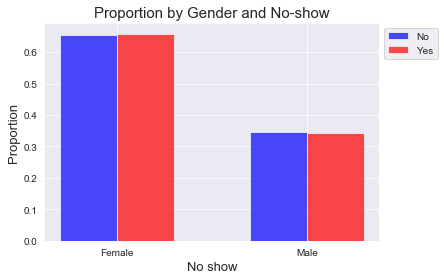

In [42]:
# plotting bar graph for visualization
No_bars_gen = plt.bar(ind, No_proportions_gen, width, color='b', alpha=.7, label='No')
Yes_bars_gen = plt.bar(ind + width, Yes_proportions_gen, width, color='r', alpha=.7, label='Yes')

# title and labels
plt.ylabel('Proportion', fontsize = 13)
plt.xlabel('No show', fontsize = 13)
plt.title('Proportion by Gender and No-show', fontsize = 15)
locations = ind + width / 2  # xtick locations
labels = ['Female', 'Male']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend(loc=2, bbox_to_anchor=(1, 1));

###### It can be deduced from the above graph that:
- The proprtion of patients that showed up by gender is evenly distributed, which implies that noth males and females show up / do not show up at the same rate. 
- Hence tentatively, Gender is not a factor that affects the rate of showing up for appointments. 

#### Q5: Do Patients with Scholarships show up more than those without?

In [43]:
# group by scholarship and noshow to get count for each category
count_sch = df.groupby(['noshow','scholarship']).count()['gender']
count_sch

noshow  scholarship
No      0              77069
        1               8238
Yes     0              19109
        1               2571
Name: gender, dtype: int64

In [44]:
# get the total count to be used in determining proportion as it is obvious that the counts are not evenly distributed
totals_sch = df.groupby('noshow').count()['gender']
totals_sch

noshow
No     85307
Yes    21680
Name: gender, dtype: int64

In [45]:
#proportion of patients that showed up
No_proportions_sch = count_sch['No'] / totals_sch['No']
No_proportions_sch

scholarship
0    0.903431
1    0.096569
Name: gender, dtype: float64

In [46]:
#proportion of patients that did not show
Yes_proportions_sch = count_sch['Yes'] / totals_sch['Yes']
Yes_proportions_sch

scholarship
0    0.881411
1    0.118589
Name: gender, dtype: float64

In [47]:
# the x locations for the bars
ind = np.arange(len(No_proportions_sch))
width = 0.3 

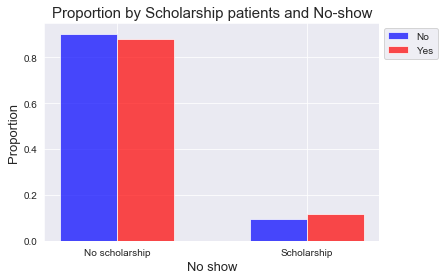

In [48]:
# plotting bar graph for visualization
No_bars_sch = plt.bar(ind, No_proportions_sch, width, color='b', alpha=.7, label='No')
Yes_bars_sch = plt.bar(ind + width, Yes_proportions_sch, width, color='r', alpha=.7, label='Yes')

# title and labels
plt.ylabel('Proportion', fontsize = 13)
plt.xlabel('No show', fontsize = 13)
plt.title('Proportion by Scholarship patients and No-show', fontsize = 15)
locations = ind + width / 2  # xtick locations
labels = ['No scholarship', 'Scholarship']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend(loc=2, bbox_to_anchor=(1, 1));

###### It can be deduced from the above graph that:
- Though, with very slight difference, patients without scholarship show up more for their appointments.

<a id='conclusions'></a>
## Conclusions
- Having finalized all the questions stated above with regards to the data, the features that seem to have significant impact as to whether a patient shows up or not are:
    - Age: (Adults and Aged patients) show up more than Teens and Young patients
    - Same day appointments: 95.3% of patients with same day appointments show up compared to 71.4% of patients with not sameday appointments
    - Health Condition: Though, with a slight difference of about 3%, patients with underlining health conditions show up more compared to those without
    - Scholarship: Also, with a very slight difference, patients without scholarship show up more than patients with scholarship
- Gender does not appear to make so much difference as the proportions of showing and not showing are relatively the same.

### References
[stackoverflow - for pie charts](https://stackoverflow.com/questions/55161508/increase-font-size-of-labels-in-pie-chart-matplotlib)

[matplotlib.org for pie charts](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html)

[Plotting with matplotlib - Part2 Lesson 4](https://classroom.udacity.com/nanodegrees/nd002-ent/parts/c785f82a-bb1d-471e-91a1-3ddb0851db3d/modules/056d1581-3e58-4c80-8a49-dd19a2b94fd0/lessons/e479a678-4d26-4d44-bfdd-38afb8e3c63a/concepts/988ab8a2-dd75-4b53-b1a4-628ff331f461)

investigate-a-dataset-template.ipynb